In [1]:
#from github -guipsamora
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple = pd.read_csv(url)

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [15]:
apple.dtypes


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [16]:
apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

In [17]:
apple = apple.set_index('Date')

apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [18]:
apple.sort_index(ascending = True).head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-19,28.25,28.38,28.25,28.25,12157600,0.44
1980-12-22,29.63,29.75,29.63,29.63,9340800,0.46
1980-12-23,30.88,31.00,30.88,30.88,11737600,0.48
1980-12-24,32.50,32.63,32.50,32.50,12000800,0.51


In [26]:
apple_month = apple.resample('BM').mean() #.resample-method for frequency conversion and resampling 
#of time series. Object must have a datetime-like index.'BM'-get last business day of each month.'BQ'-quarter'BA'-Annual'W'-week

apple_month.head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
1981-05-29,29.052000,29.188000,28.995000,28.995000,7.380240e+06,0.452500
1981-06-30,30.801818,30.876364,30.703636,30.703636,1.080189e+07,0.477727
1981-07-31,24.436364,24.531818,24.374545,24.374545,7.584436e+06,0.379545
1981-08-31,22.336500,22.386500,22.218500,22.218500,6.857760e+06,0.345000


In [28]:
#no of days betn first and last date
print(apple.index.max()-apple.index.min())

12261 days 00:00:00


In [29]:
(apple.index.max() - apple.index.min()).days

12261

In [30]:
#how many months of data do we have
apple_months = apple.resample('BM').mean()

len(apple_months.index)

404

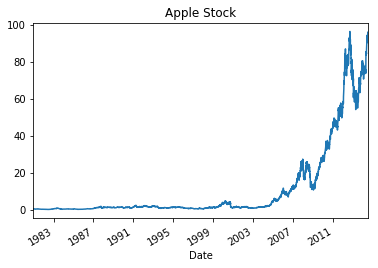

In [32]:
# makes the plot and assign it to a variable
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

# changes the size of the graph
#fig = appl_open.get_figure()
#fig.set_size_inches(13.5, 9)